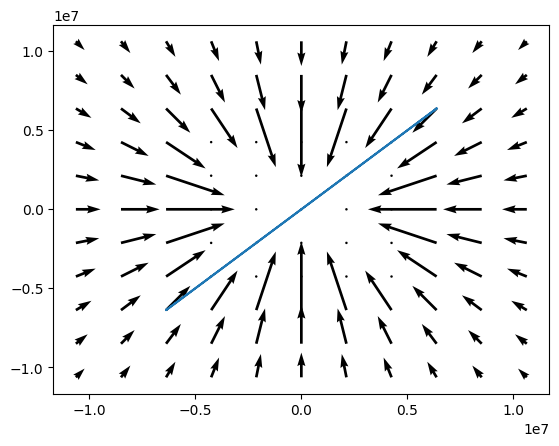

In [22]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# declare constants
G = 6.6738E-11 # Nm^2/kg^2, gravitational constant
r_e = 6.378E6 # m
pos_e = np.array([0, 0])
a = 2.645E3 # m

h = r_e + a

m_e = 5.972E24 # kg

pos_e = np.array([0,0])
poe_s = np.array([h, 0])

v = np.array([0, 7.8]) # km / s

# make grid
coord_step = r_e / 3
x = np.linspace(-5 * coord_step, 5 * coord_step, 11)
y = np.linspace(-5 * coord_step, 5 * coord_step, 11)

X,Y = np.meshgrid(x, y)

u = np.zeros(X.shape)
v = np.zeros(Y.shape)

def gfield(m, r_o, pos_o, pos_x, pos_y):
    rx = pos_o[0] - pos_x
    ry = pos_o[1] - pos_y
    r = np.array([rx, ry])
    r_mag = np.linalg.norm(r)
    if r_mag < r_o:
        return (0, 0)
    rhat = r / r_mag
    g_mag = G * m / (r_mag ** 2)
    gx = g_mag * rhat[0]
    gy = g_mag * rhat[1]
    return (gx, gy)

for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        u[i, j], v[i, j] = gfield(m_e, r_e, pos_e, X[i, j], Y[i, j])

plt.quiver(X, Y, u, v)
plt.plot(r_e*np.cos(np.linspace(0, np.pi * 2, 361)), r_e*np.sin(np.linspace(0, np.pi * 2, 361)))
plt.show()